In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## CAPSTONE PROJECT Padi-Ku 
Rice Leaf Disease Detection with Transfer Learning using Mobile Net V2 using Keras

In [11]:
# import the libraries as shown below
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential, load_model
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
base_dir = "/content/drive/Shareddrives/Machine Learning/rice-leaf-desease (1)"

2.5.0


In [12]:
BATCH_SIZE = 32
IMG_SIZE = (64,64)

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation') # set as validation data


Found 11214 images belonging to 4 classes.
Found 4806 images belonging to 4 classes.


Without Pretrained Model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer = "he_uniform", padding = "valid", input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer = "he_uniform"),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(512, activation = "relu", kernel_initializer = "he_uniform"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(512, activation = "relu", kernel_initializer = "he_uniform"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax', kernel_initializer="glorot_uniform")
])

In [ ]:
model.summary()

With Pretrained Model (Transfer Learning)

In [15]:
pretrained_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in pretrained_model.layers:
    layer.trainable = False
next_layer = Flatten()(pretrained_model.output)
next_layer2 = Dropout(0.3)(next_layer)
prediction = Dense(4, activation='softmax')(next_layer2)
model = Model(inputs=pretrained_model.input, outputs=prediction)

In [ ]:
model.summary()

In [15]:
from keras.optimizers import Adam
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [16]:
initial_epochs = 15
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=initial_epochs,
)

Epoch 1/15
351/351 [==============================] - 9277s 26s/step - loss: 0.7490 - accuracy: 0.6841 - val_loss: 0.9224 - val_accuracy: 0.5581
Epoch 2/15
351/351 [==============================] - 102s 292ms/step - loss: 0.3656 - accuracy: 0.8544 - val_loss: 0.6417 - val_accuracy: 0.7428
Epoch 3/15
351/351 [==============================] - 103s 293ms/step - loss: 0.2304 - accuracy: 0.9127 - val_loss: 0.6325 - val_accuracy: 0.7790
Epoch 4/15
351/351 [==============================] - 103s 293ms/step - loss: 0.1645 - accuracy: 0.9385 - val_loss: 0.4147 - val_accuracy: 0.8660
Epoch 5/15
351/351 [==============================] - 104s 295ms/step - loss: 0.1182 - accuracy: 0.9548 - val_loss: 0.4741 - val_accuracy: 0.8500
Epoch 6/15
351/351 [==============================] - 103s 294ms/step - loss: 0.1043 - accuracy: 0.9618 - val_loss: 0.4333 - val_accuracy: 0.8768
Epoch 7/15
351/351 [==============================] - 103s 294ms/step - loss: 0.0862 - accuracy: 0.9677 - val_loss: 0.4772 - 

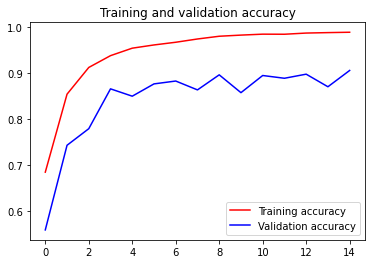

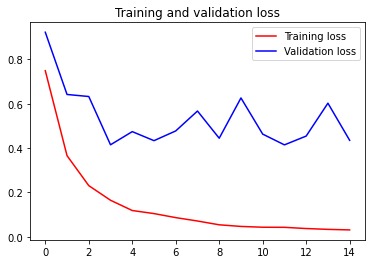

<Figure size 432x288 with 0 Axes>

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [18]:
PADIKU_SAVED_MODEL = "padiku_saved_model"

In [19]:
tf.saved_model.save(model, PADIKU_SAVED_MODEL)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: padiku_saved_model/assets


In [20]:
model.save("padiku_v4.h5")

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer = "he_uniform", padding = "valid", input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer = "he_uniform"),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(512, activation = "relu", kernel_initializer = "he_uniform"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(512, activation = "relu", kernel_initializer = "he_uniform"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax', kernel_initializer="glorot_uniform")
])

In [ ]:
model.summary()

In [ ]:
from keras.optimizers import Adam
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [ ]:
next_epoch = 15
initial_epochs = 15
total_epochs = next_epoch + initial_epochs
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=initial_epochs,
)

In [69]:
class_name = train_generator.class_indices
name_of_class = []
for key, value in class_name.items():
  name_of_class.append(key)
print(class_name)
print(name_of_class)

{'Bacterial leaf blight (1)': 0, 'Brown spot (1)': 1, 'Health (1)': 2, 'Leaf smut (1)': 3}
['Bacterial leaf blight (1)', 'Brown spot (1)', 'Health (1)', 'Leaf smut (1)']


In [6]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

# dimensions of our images
img_width, img_height = 224, 224

# load the model we saved
model = load_model('padiku_v3.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(f"{fn} detected as {name_of_class[np.argmax(classes)]}, score is {100 * np.max(classes)}")

Saving Leaf_smut_original_DSC_0293.JPG_1d037160-9186-4971-b991-d537aac94dad.JPG to Leaf_smut_original_DSC_0293.JPG_1d037160-9186-4971-b991-d537aac94dad.JPG


NameError: ignored

In [8]:
model.save("padiku_v3.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
